This notebook shows how to generate a synthetic District Heating Network (DHN) using the developed models.

A graph generator generates a random graph mimicking DHN topology and a heating model generates demands for the substation nodes.

#### Loading python packages

In [1]:
# Packages

import os
import networkx as nx
import sys
import os
from src.graph_generator import GraphDHNGenerator
from src.graph_generator_params import GraphGeneratorParameters
from src.dhn_topology import DHNTopology
from src.demands_model_dpe import generate_substation_demands

import matplotlib.pyplot as plt
import matplotlib as mpt
from cycler import cycler

mpt.rcParams['lines.linewidth'] = 1.4
mpt.rcParams['font.size'] = 12
mpt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.style.use('ggplot')


#### Synthetic DHN generator

We define control parameters including the number of connected regions, number of degree max per node, the number of nodes per regions, and the *target ratio* between number of edges and number of nodes. 
Other control parameters may be defined. For more detail, the reader is encouraged to take a look at the class **GraphGeneratorParameters**.


The target ratio has been introduced to influence the *presence of loops* inside the DHN. From expertise point of view, DHNs have low mean nodes degree and have few or none loops.

In [ ]:
params = GraphGeneratorParameters(target_ratio=1.1, nb_regions=2, nb_nodes_per_region=20, E_rp=0.5, E_ee=0.1, edge_weight_mean=1.0, edge_weight_std=0.1, nb_producers_to_reach=2)

Then, we create a random graph generator object (**GraphDHNGenerator**) which uses the control parameters as properties.

In [ ]:
generator = GraphDHNGenerator(params)

Now, we have everything to generate a random DHN. To do so, we call a function of the class **GraphDHNGenerator**.

In [ ]:
generator.generate_random_connected_dhn()

# We shown the number of producers and the number of nodes of the DHN generated.
print(f'Producers are = {generator.producer_indices}')
print(f'Number of nodes are = {len(generator.node_positions)}')

#### DHN topology file

From the generated DHN, we generate a topology file in excel format containing the information of the substation nodes, the pipes and the heating demands of the nodes.

The following cell may take few minutes. 

In [ ]:
topology_dhn = DHNTopology(generator, 
                           graph_folder_name = 'DHN_test',
                           heating_demand_model=2) # If 1 use heating law, 2 use DPE French data

In [ ]:
topology_dhn._loads

In [ ]:
plt.plot(topology_dhn._loads.loc[:,1])

### Generating 100 synthetic DHNs

Here, we generate 100 synthetic DHNs. Note that this code may take several minutes. 

In [ ]:
import random

for i in [21]:
    nb_regions = random.randint(2, 3) # Between 2 and 5 regions
    nb_nodes_per_region = random.randint(20, 41) # Between 10 to 40 nodes per region
    nb_producers_to_reach = random.randint(1, nb_regions) # Between 1 to the number of regions
    params = GraphGeneratorParameters(target_ratio=1.01, nb_regions=nb_regions, nb_nodes_per_region=nb_nodes_per_region, E_rp=0.5, E_ee=0.1, edge_weight_mean=1.0, edge_weight_std=0.1, nb_producers_to_reach=nb_producers_to_reach)
    generator = GraphDHNGenerator(params)
    generator.generate_random_connected_dhn()
    topology_dhn = DHNTopology(generator, 
                               graph_folder_name = f'synthetic_dhn_{i}',
                                heating_demand_model=2) # If 1 use heating law, 2 use DPE French data

#### Reviewing demands

We regenerate here the demands topology files.

Treating network 1
File is not a zip file
Generating new graph
Generating each region ...
	Region 1 ...
	Region 2 ...
	Region 3 ...
	Region 4 ...
Loop --> adding edges between regions
	 --> finished
cycle found [(20, 19), (19, 22), (22, 20)]
cycle found [(74, 73), (73, 85), (85, 74)]
Found cycles = [[(20, 19), (19, 22), (22, 20)], [(74, 73), (73, 85), (85, 74)]]
Treating the cycle [(20, 19), (19, 22), (22, 20)]
Edge (20,19) removed
Treating the cycle [(74, 73), (73, 85), (85, 74)]
Edge (74,73) removed
DHN-based graph generated !


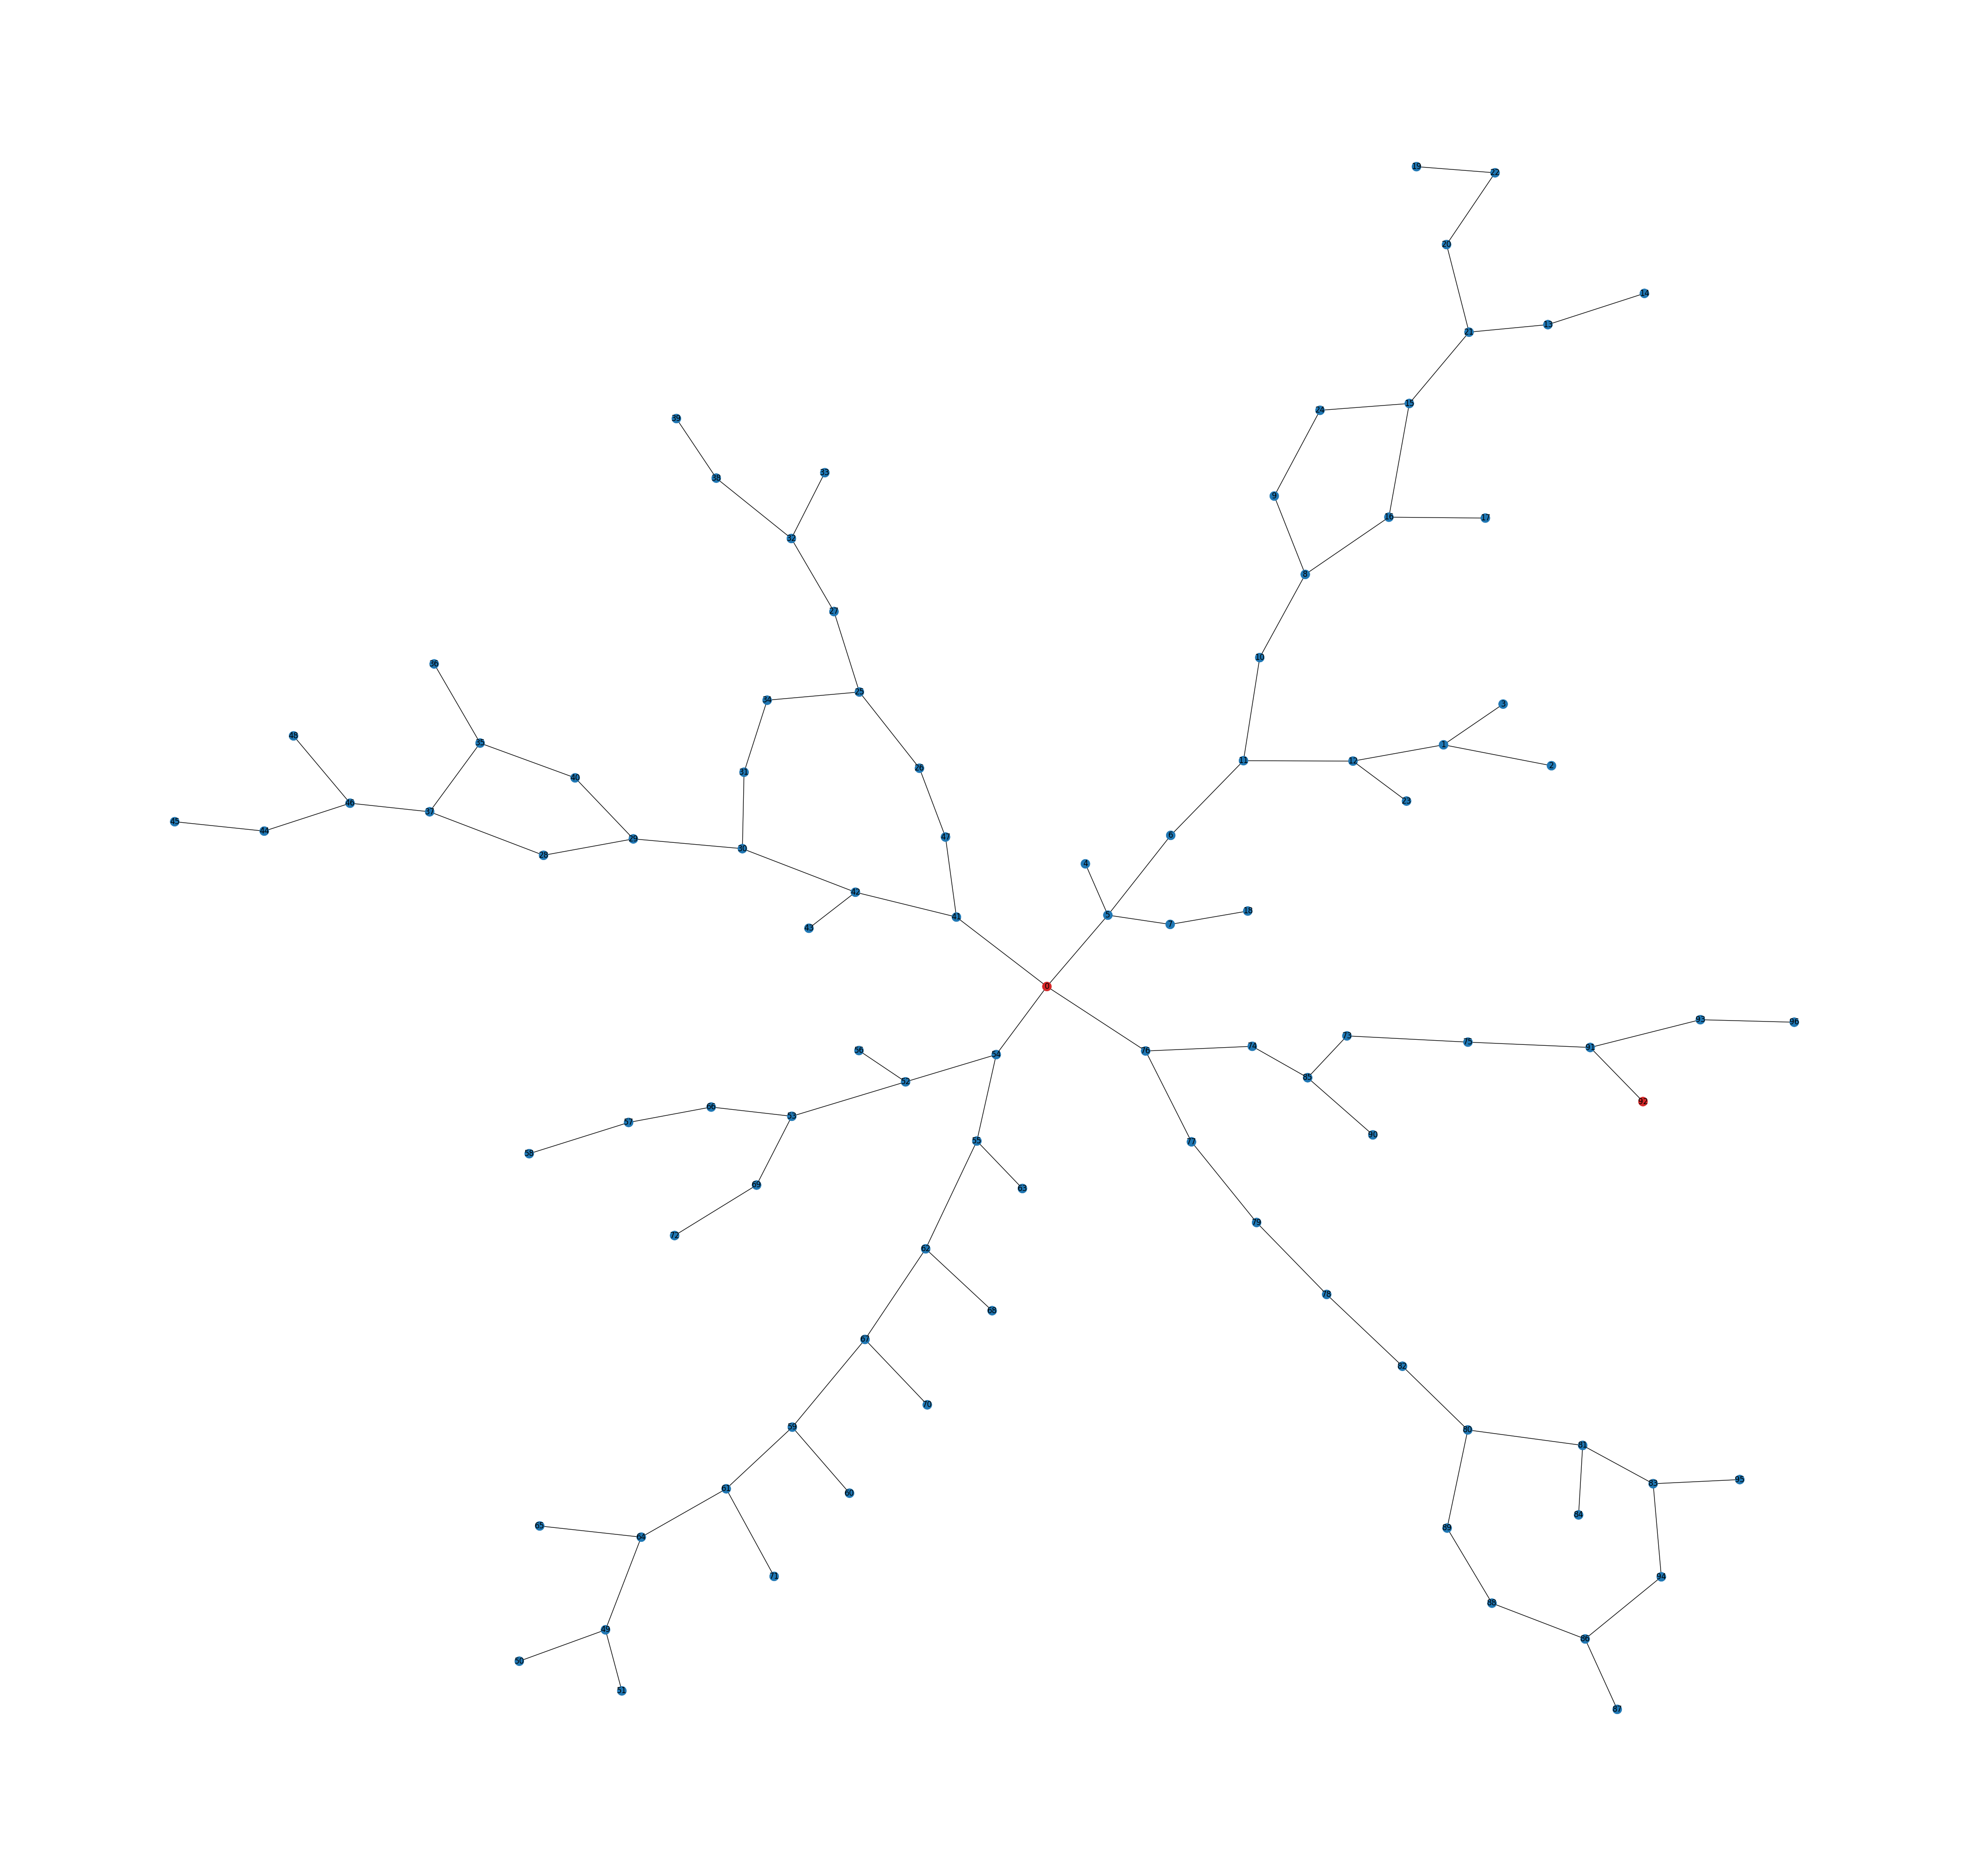

File is not a zip file
Treating network 2
File is not a zip file
Generating new graph
Generating each region ...
	Region 1 ...
	Region 2 ...
	Region 3 ...
	Region 4 ...
Loop --> adding edges between regions
	 --> finished
cycle found [(29, 30), (30, 40), (40, 29)]
cycle found [(40, 29), (29, 30), (30, 40)]
Found cycles = [[(29, 30), (30, 40), (40, 29)], [(40, 29), (29, 30), (30, 40)]]
Treating the cycle [(29, 30), (30, 40), (40, 29)]
Edge (29,30) removed
Treating the cycle [(40, 29), (29, 30), (30, 40)]
DHN-based graph generated !


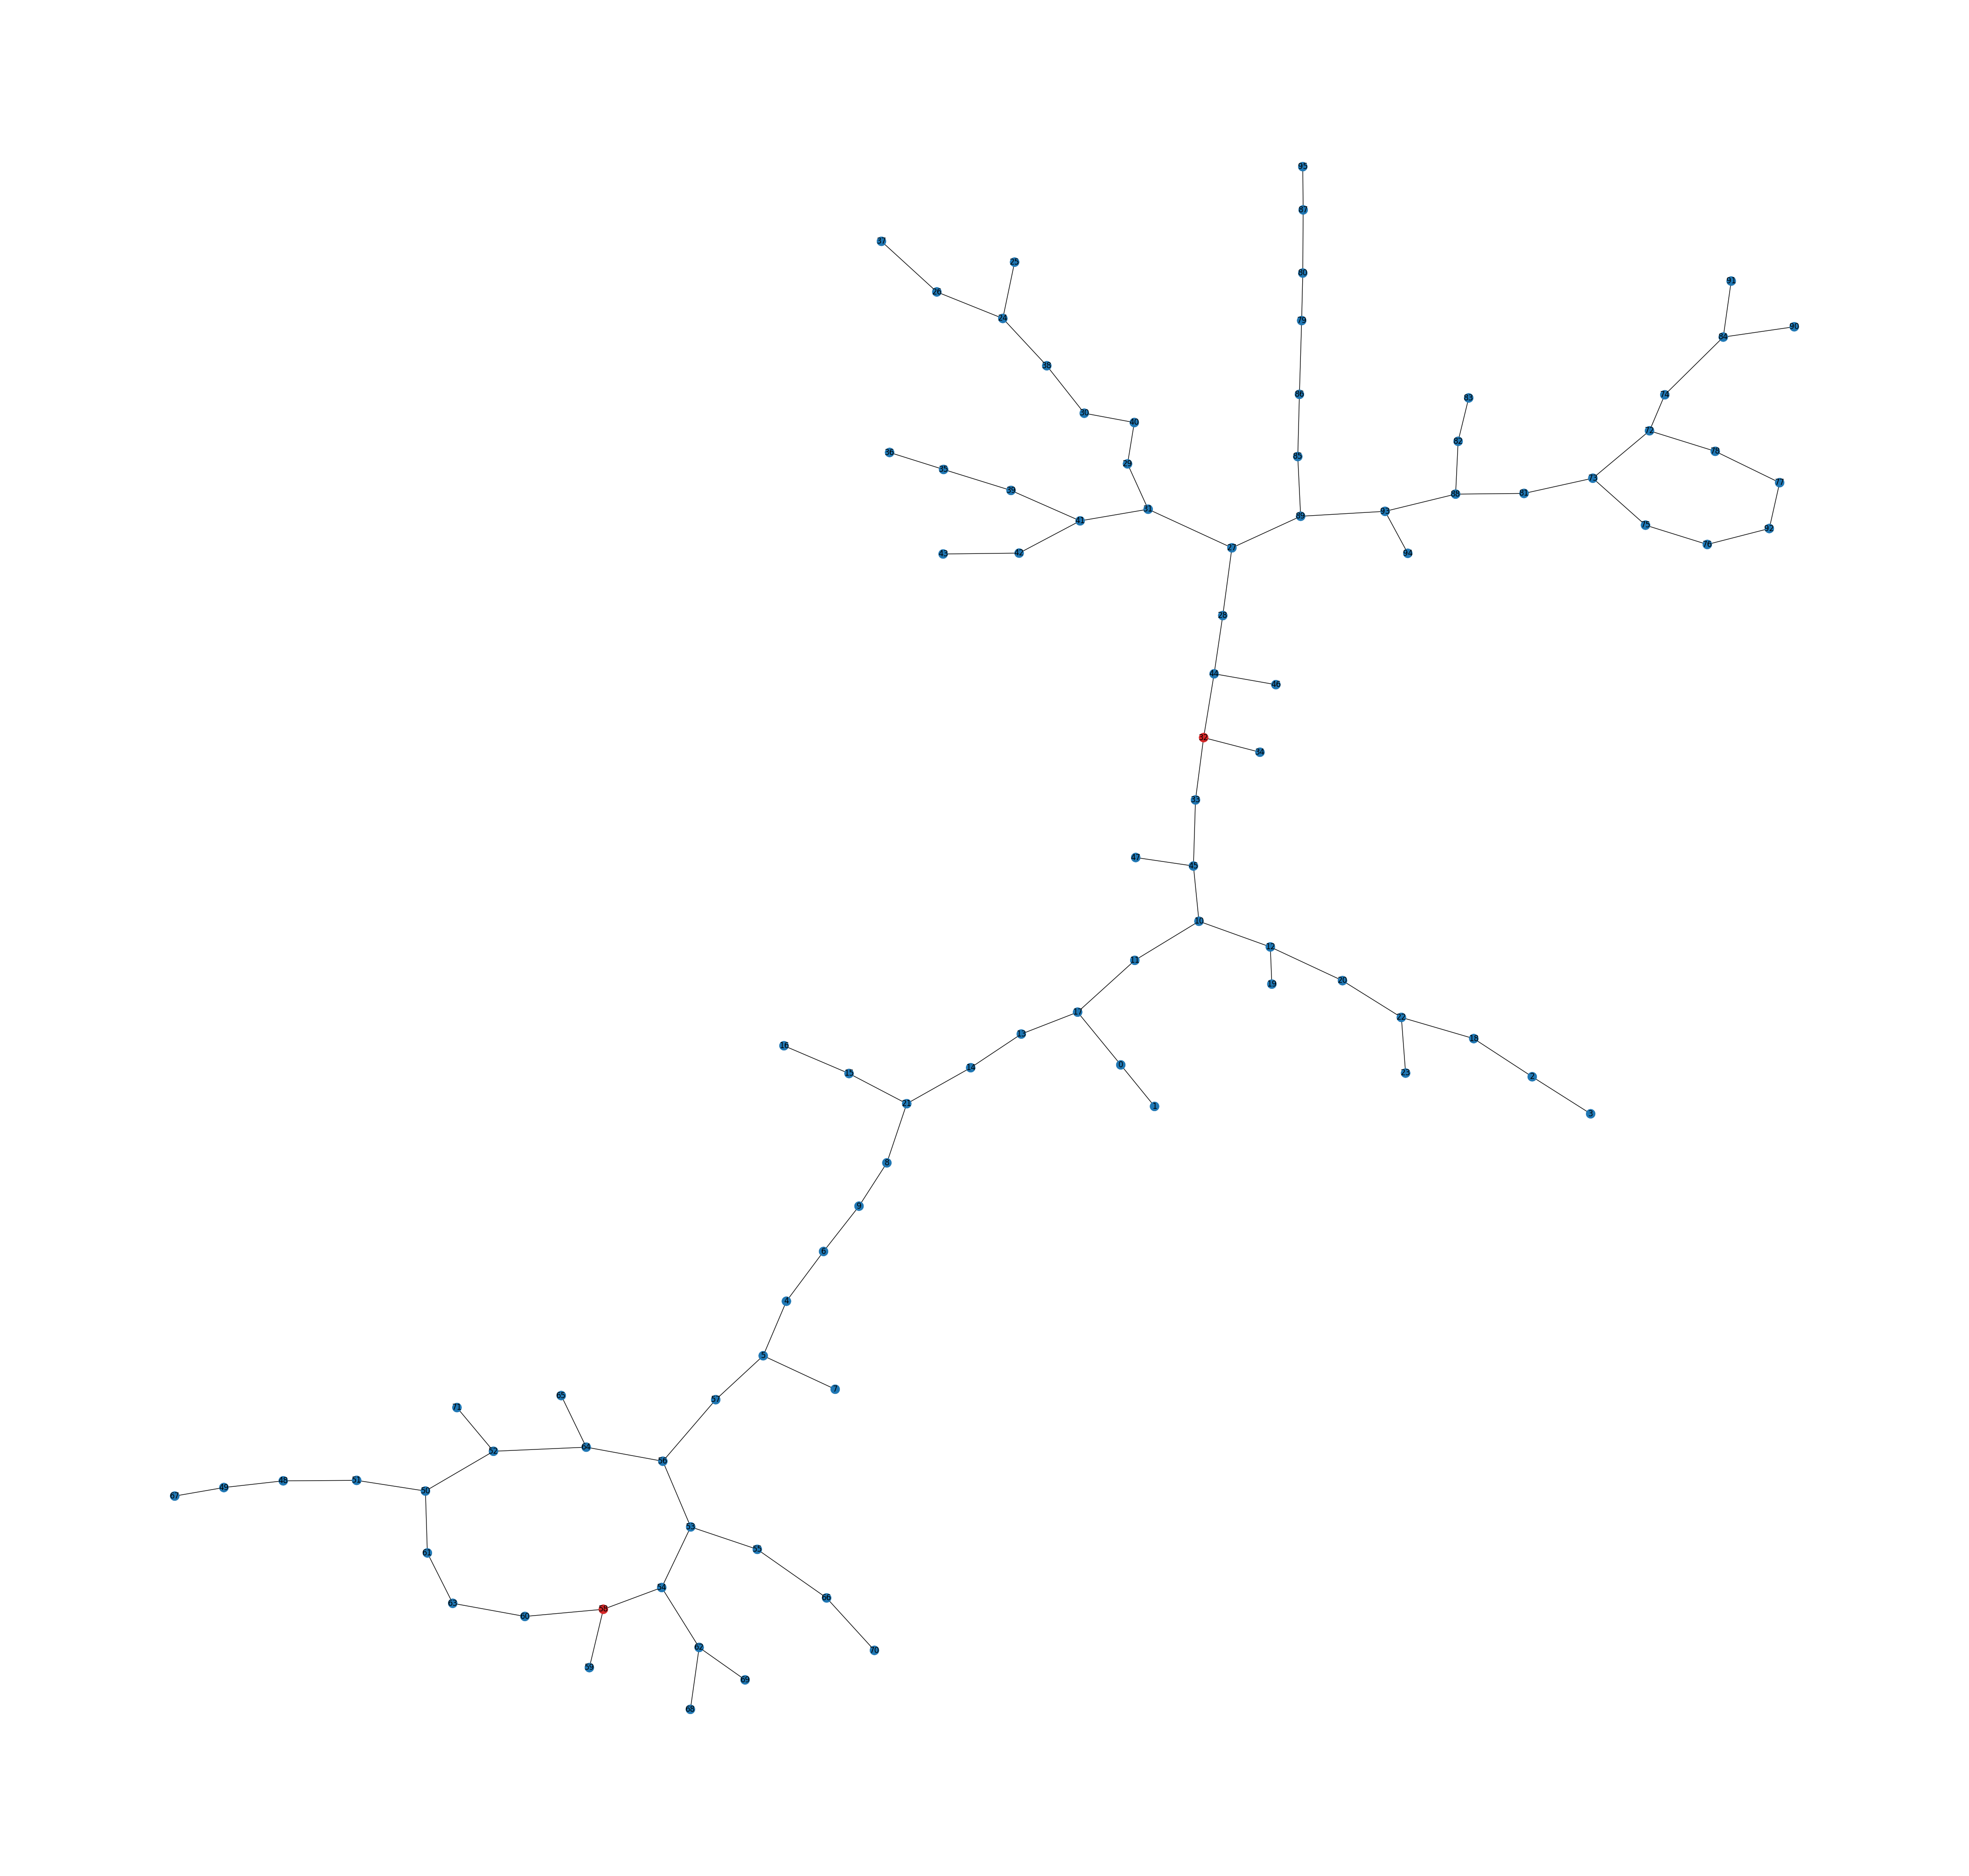

File is not a zip file
Treating network 3
Treating network 4


In [2]:

for id_ in range(1,47):
    topology_file = os.path.join('Synthetic_DHNs', f'synthetic_dhn_{id_}', 'topology.xlsx')
    if os.path.isfile(topology_file):
        try:
            print(f'Treating network {id_}')
            generator = GraphDHNGenerator()
            generator.read_generated_graph(topology_file, plot_graph=False)
            topology_dhn = DHNTopology(generator, 
                                    graph_folder_name = f'synthetic_dhn_{id_}',
                                    heating_demand_model=2)
        except Exception as ex:
            print(ex)
            print('Generating new graph')
            nb_regions = 4
            nb_nodes_per_region = 24
            nb_producers_to_reach = 4
            params = GraphGeneratorParameters(target_ratio=1.01, nb_regions=nb_regions, nb_nodes_per_region=nb_nodes_per_region, E_rp=0.5, E_ee=0.1, edge_weight_mean=1.0, edge_weight_std=0.1, nb_producers_to_reach=nb_producers_to_reach)
            generator = GraphDHNGenerator(params)
            generator.generate_random_connected_dhn()
            topology_dhn = DHNTopology(generator, 
                                    graph_folder_name = f'synthetic_dhn_{id_}',
                                        heating_demand_model=2) # If 1 use heating law, 2 use DPE French data

In [ ]:
plt.plot(topology_dhn._loads[42])